# __2. 데이터와 표본분포__

##### 파이썬 패키지, 데이터 import

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
state = pd.read_csv('./data/state.csv')
dfw = pd.read_csv('./data/dfw_airline.csv')
sp500_px = pd.read_csv('./data/sp500_data.csv.gz', index_col=0)
sp500_sym = pd.read_csv('./data/sp500_sectors.csv')
kc_tax = pd.read_csv('./data/kc_tax.csv.gz')
lc_loans = pd.read_csv('./data/lc_loans.csv')
airline_stats = pd.read_csv('./data/airline_stats.csv')
loans_income = pd.read_csv('./data/loans_income.csv').squeeze('columns')

## __2.1 임의표본추출과 표본편향__

#### __표본__ : 더 큰 데이터 집합(모집단)으로부터 얻은 부분집합
#### __모집단__ : 어떤 데이터 집합을 구성하는 전체 대항 혹은 전체 집합 (이론적인 가상의 집합을 의미하기도 함)
#### __N__ : 모집단(표본)의 크기

#### __임의표본추출(임의표집, 랜덤표본추출)__ : 모집단 내 선택 가능한 원소들을 무작위로 표본 추출
#### __단순임의표본__ : 임의표본추출로 얻은 표본
#### 복원추출 : 중복 추출이 가능하도록 해당 샘플을 다시 모집단에 포함시킴
#### 비복원추출 : 한 번 뽑힌 원소는 추후 추첨에 사용하지 않음

#### __층화표본추출(층화표집)__ : 모집단을 층으로 나눈 뒤, 각 층에서 무작위로 표본을 추출하는 것
#### __계층__ : 공통된 특징을 가진 모집단의 동종 하위 그룹

#### __대표성__ : 완결성, 형식의 일관성, 깨끗함 및 각 데이터 값의 정확성

#### __편향(bias)__ : 측정 과정 혹은 표본추출과정에서 발생하는 계통적인(systematic) 오차
#### __표본편항__ : 모집단을 잘못 대표하는 표본
#### 대표되도록 의도된 모집단으로부터 추출되지 않고 비임의(nonrandom) 방식으로 표본이 추출

## __2.2 선택편향__

#### __선택편향__ : 관측 데이터를 선택하는 방식 때문에 생기는 편향
#### 데이터 스누핑 : 뭔가 흥미로운 것을 찾아 광범위하게 데이터를 살피는 것
#### 방대한 검색 효과 : 중복 데이터 모델링이나 너무 많은 예측변수를 고려하는 모델링에서 비롯되는 편향 혹은 비재현성

#### __평균으로의 회귀__ : 주어딘 어떤 변수를 연속적으로 측정했을 때 나타나는 현상

## __2.3 통계학에서의 표본분포__

#### __표본통계량__ :  모집단에서 추출된 표본 데이터들로부터 얻은 측정 지표
#### 일반적으로 표본통계량으로 어떤것을 측정하거나 무언가를 모델링 하기 위해 표본을 추출함


#### __데이터 분포__ : 어떤 데이터 집합에서 각 개별 __값__의 도수분포
#### __표본 분포(sampling distribution)__ : 여러 표본들 혹은 재표본들로부터 얻은 표본통계량의 도수분포표
#### 데이터 분포라고 알려진 개별 데이터 포인트의 분포와 표본분포라고 알려진 표본통계량의 분포를 구별하는 것이 중요
#### 표본통계량의 분포는 데이터 자체의 분포보다 규칙적이고 종모양일 가능성이 높다.
#### 표본이 클 수록 표본통계량의 분포가 좁아진다.

In [12]:
# 렌딩 클럽에 대출을 신청한 사람들을 평가하기 위한 연간 소득 정보를 사용하는 예
# 1000개의 앖으로 이뤄진 표본, 5개 값의 평균 1000개로 이뤄진 표본, 20개 값의 평균 1000개로 이뤄진 표본

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type':'Data',
})

sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

,income,type
7713,75000.0,Data
49463,60000.0,Data
20218,37233.0,Data
46380,64000.0,Data
32555,44000.0,Data


findfont: Font family ['NanumSquare'] not found. Falling back to DejaVu Sans.


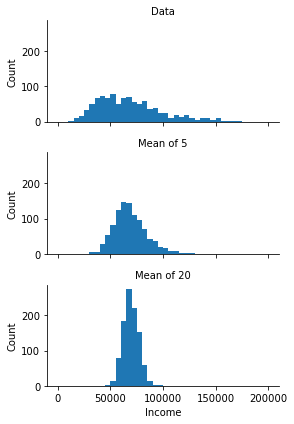

In [11]:
# 히스토그램

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

### __2.3.1 중심극한정리__

#### __중심극한정리__ : 모집단이 정규분포가 아니더라도, 표본크기가 충분하고 데이터가 정규성을 크게 이탈하지 않는 경우, 종 모양의 정규곡선을 따른다.
#### 이를 이용해 표본분포에 대한 신뢰구간이나 가설검정을 계상하는데 t분포와 같은 정규근사 공식을 사용함

### __2.3.2 표준오차__

#### __표준오차__ : 통계에 대한 표본분포의 변동성을 한마디로 말해주는 단일 측정 지표
#### 표본 값들의 __표준편차 $s$와 표본크기 $n$__을 기반으로 한 통계량을 이용하여 추정
### $SE = \frac{s}{\sqrt{n}}$

#### __n제곱근의 법칙 : 표본크기가 커지면 표준오차가 줄어든다(표본크기는 표준오차에 반비례한다)__

#### __표준오차 측정 시 고려사항__
#### 모집단에서 완전히 새로운 샘플들을 많이 수집한다.
#### 각각의 새 샘플에 대해 통계량(예 : 평균)을 계산한다.
#### 2단계에서 얻은 통계량의 표준편차를 계산한다. 이것을 표준오차의 추정치로 사용한다.

#### __표준편차와 표준오차__
#### 개별 데이터 포인트의 변동성을 측정 -> __표준편차__
#### 표본 측정 지표의 변동성을 측정 -> __표준오차__

## __2.4 부트스트랩__

#### __부트스트랩__ : 현재 있는 표본에서 추가적으로 표본을 복원추출하고 각 표본에 대한 통계량과 모델을 다시 계산하는 것

#### 부트스트랩 표본 : 관측 데이터 집합으로부터 얻은 복원추출 표본
#### 재표본추출(재표집, 리샘플링) : 관측 데이터로부터 반복해서 표본추출하는 과정, 부트스트랩과 순열(셔플링) 과정 포함

#### 부트스트랩 재표본추출 알고리즘

#### 1. 샘플 값을 하나 뽑아서 기록하고 다시 제자리에 놓는다.
#### 2. n번 반복한다.
#### 3. 재표본추출된 값의 평균을 기록한다.
#### 4. 1~3단계를 R번 반복한다. (R은 임의로 설정, 반복 횟수가 많을 수록 표준오차나 신뢰구간에 대한 추정이 명확해짐)
#### 5. R개의 결과를 사용하여
* a. 표준편차(표본평균의 표준오차)를 계산한다.
* b. 히스토그램 또는 상자그림을 그린다.
* c. 신뢰구간을 찾는다.


In [4]:
# 대출 신청자의 소득 데이터에 부트스트랩을 적용하는 코드

results=[]
for nrepeat in range(1000):
    sample = resample(loans_income) # scikit-learn의 resample 메서드
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics')
print(f'original: {loans_income.median()}')
print(f'bias:{results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics
original: 62000.0
bias:-75.35250000000087
std. error: 221.7005596111174
